In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [87]:
data = pd.read_csv("LCV.csv")

Features and Target variables

In [88]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [89]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

Reshape the input data for all models

In [91]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [92]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500
2/2 [==============================] - 2s 382ms/step - loss: 234.6060 - val_loss: 206.1765
Epoch 2/500
2/2 [==============================] - 0s 42ms/step - loss: 233.8953 - val_loss: 205.6009
Epoch 3/500
2/2 [==============================] - 0s 36ms/step - loss: 233.2935 - val_loss: 205.0676
Epoch 4/500
2/2 [==============================] - 0s 27ms/step - loss: 232.7048 - val_loss: 204.5223
Epoch 5/500
2/2 [==============================] - 0s 30ms/step - loss: 232.1521 - val_loss: 203.9184
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 231.4346 - val_loss: 203.2303
Epoch 7/500
2/2 [==============================] - 0s 31ms/step - loss: 230.6507 - val_loss: 202.4269
Epoch 8/500
2/2 [==============================] - 0s 34ms/step - loss: 229.7317 - val_loss: 201.4756
Epoch 9/500
2/2 [==============================] - 0s 26ms/step - loss: 228.7577 - val_loss: 200.3343
Epoch 10/500
2/2 [==============================] - 0s 35ms/step - loss: 227.4901

Visualize LSTM results

0.8188855538683724


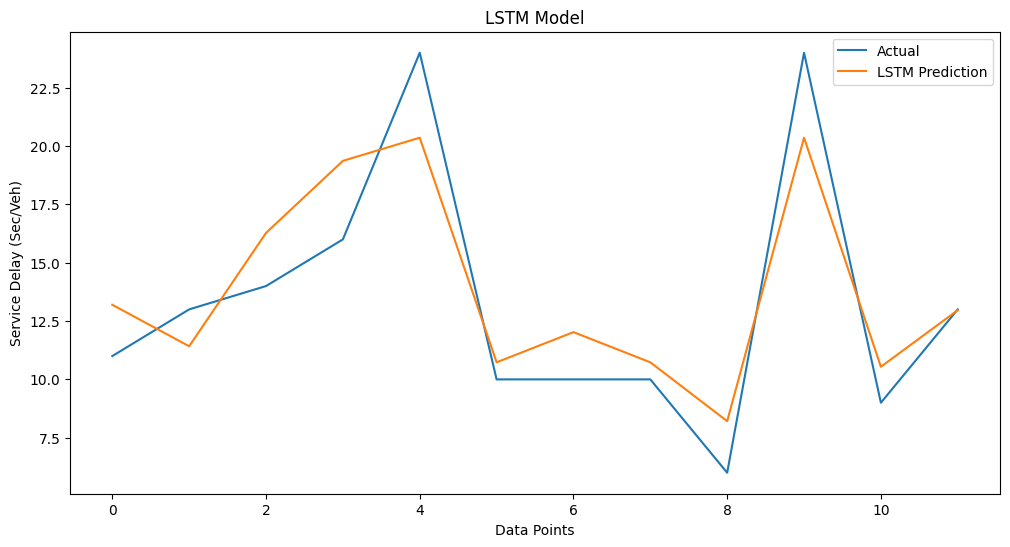

In [93]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [94]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/500
2/2 [==============================] - 8s 5s/step - loss: 234.3431 - val_loss: 205.6679
Epoch 2/500
2/2 [==============================] - 0s 38ms/step - loss: 233.3132 - val_loss: 204.7515
Epoch 3/500
2/2 [==============================] - 0s 32ms/step - loss: 232.2916 - val_loss: 203.8031
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 231.3438 - val_loss: 202.7359
Epoch 5/500
2/2 [==============================] - 0s 30ms/step - loss: 230.1702 - val_loss: 201.4637
Epoch 6/500
2/2 [==============================] - 0s 31ms/step - loss: 228.7156 - val_loss: 199.9047
Epoch 7/500
2/2 [==============================] - 0s 28ms/step - loss: 226.9008 - val_loss: 197.9509
Epoch 8/500
2/2 [==============================] - 0s 30ms/step - loss: 224.7302 - val_loss: 195.4555
Epoch 9/500
2/2 [==============================] - 0s 28ms/step - loss: 222.0728 - val_loss: 192.2301
Epoch 10/500
2/2 [==============================] - 0s 35ms/step - loss: 218.4769 - 

Visualize BiLSTM results

0.9245605748155535


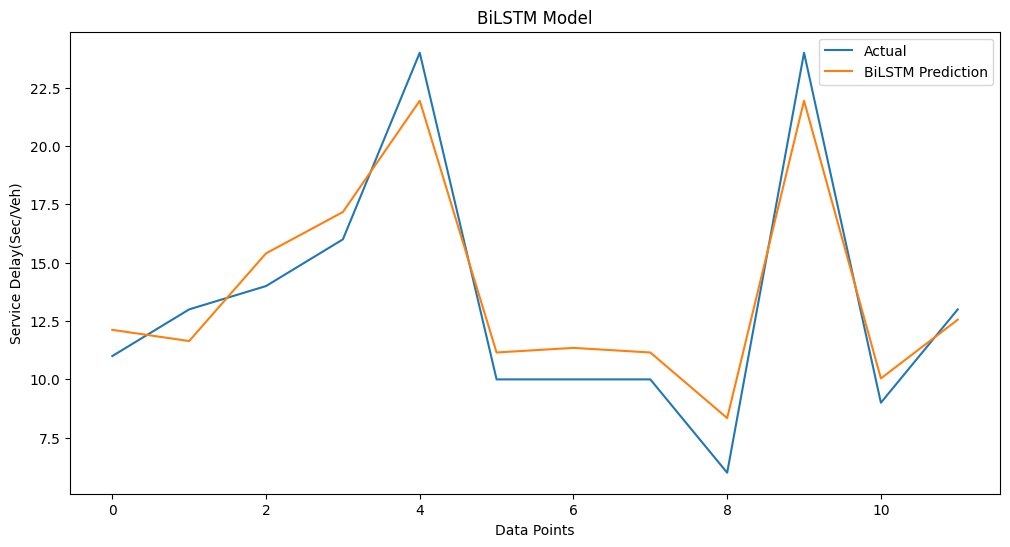

In [95]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [96]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/600
2/2 [==============================] - 2s 279ms/step - loss: 234.2788 - val_loss: 205.3442
Epoch 2/600
2/2 [==============================] - 0s 23ms/step - loss: 232.9174 - val_loss: 204.0486
Epoch 3/600
2/2 [==============================] - 0s 31ms/step - loss: 231.4669 - val_loss: 202.7463
Epoch 4/600
2/2 [==============================] - 0s 34ms/step - loss: 230.0384 - val_loss: 201.3994
Epoch 5/600
2/2 [==============================] - 0s 33ms/step - loss: 228.7088 - val_loss: 199.9586
Epoch 6/600
2/2 [==============================] - 0s 31ms/step - loss: 227.0265 - val_loss: 198.3331
Epoch 7/600
2/2 [==============================] - 0s 28ms/step - loss: 225.3321 - val_loss: 196.4426
Epoch 8/600
2/2 [==============================] - 0s 28ms/step - loss: 223.1794 - val_loss: 194.2141
Epoch 9/600
2/2 [==============================] - 0s 16ms/step - loss: 220.5768 - val_loss: 191.5572
Epoch 10/600
2/2 [==============================] - 0s 31ms/step - loss: 217.8199

Visualize GRU results

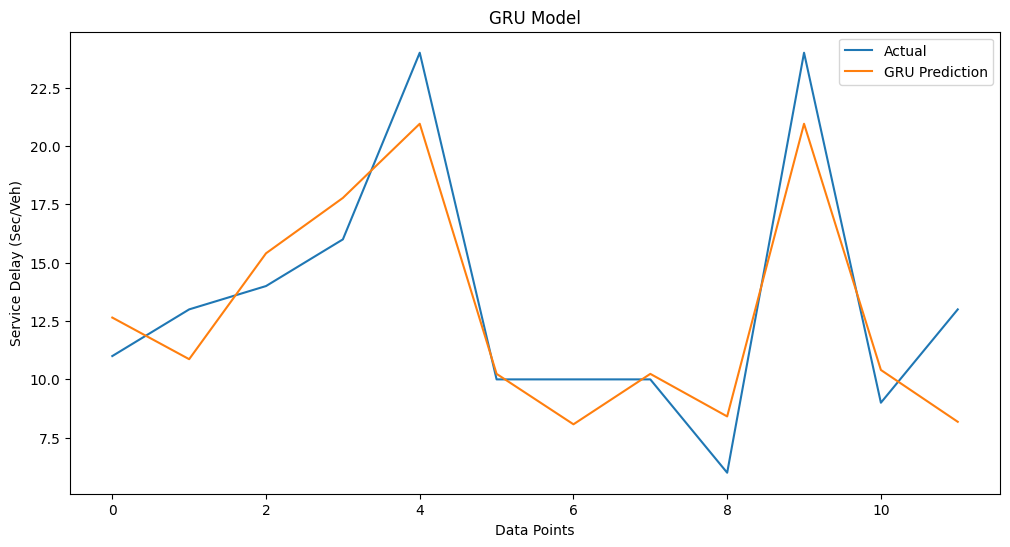

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [98]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/600
2/2 [==============================] - 3s 364ms/step - loss: 234.5436 - val_loss: 205.1833
Epoch 2/600
2/2 [==============================] - 0s 19ms/step - loss: 232.6462 - val_loss: 203.6655
Epoch 3/600
2/2 [==============================] - 0s 32ms/step - loss: 231.0701 - val_loss: 202.1592
Epoch 4/600
2/2 [==============================] - 0s 33ms/step - loss: 229.3102 - val_loss: 200.4692
Epoch 5/600
2/2 [==============================] - 0s 33ms/step - loss: 227.5900 - val_loss: 198.4741
Epoch 6/600
2/2 [==============================] - 0s 17ms/step - loss: 225.3687 - val_loss: 196.1087
Epoch 7/600
2/2 [==============================] - 0s 17ms/step - loss: 222.6708 - val_loss: 193.2582
Epoch 8/600
2/2 [==============================] - 0s 33ms/step - loss: 219.5032 - val_loss: 189.7686
Epoch 9/600
2/2 [==============================] - 0s 34ms/step - loss: 215.4250 - val_loss: 185.4479
Epoch 10/600
2/2 [==============================] - 0s 32ms/step - loss: 210.7263

Visualize BiGRU results

0.9329389459804371


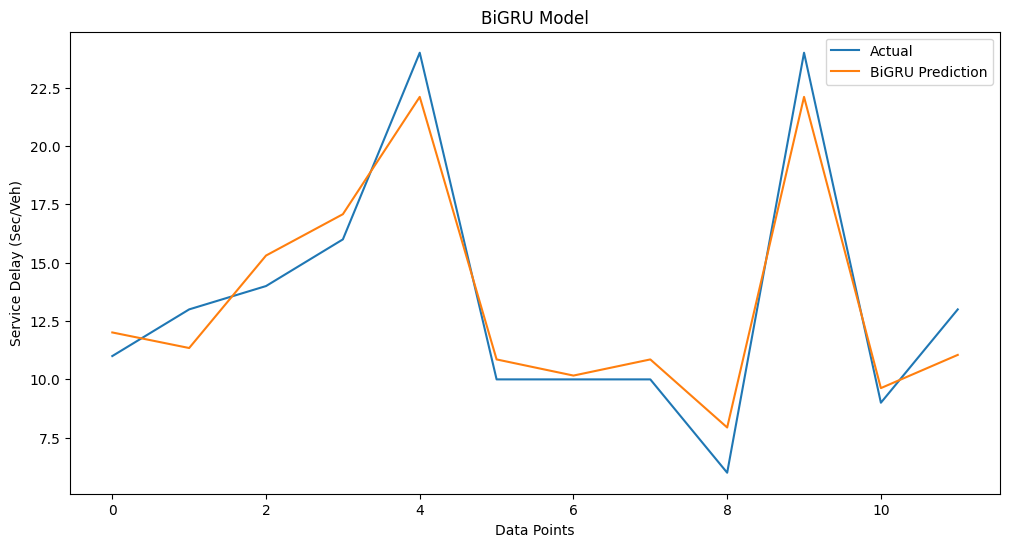

In [99]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [100]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=600, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/600
2/2 [==============================] - 0s 102ms/step - loss: 234.1588 - val_loss: 202.8183
Epoch 2/600
2/2 [==============================] - 0s 33ms/step - loss: 229.4629 - val_loss: 199.1179
Epoch 3/600
2/2 [==============================] - 0s 17ms/step - loss: 225.4907 - val_loss: 195.6277
Epoch 4/600
2/2 [==============================] - 0s 34ms/step - loss: 221.7554 - val_loss: 192.2527
Epoch 5/600
2/2 [==============================] - 0s 16ms/step - loss: 218.0873 - val_loss: 188.8420
Epoch 6/600
2/2 [==============================] - 0s 32ms/step - loss: 214.1832 - val_loss: 185.2901
Epoch 7/600
2/2 [==============================] - 0s 17ms/step - loss: 210.2381 - val_loss: 181.4789
Epoch 8/600
2/2 [==============================] - 0s 33ms/step - loss: 206.1863 - val_loss: 177.2798
Epoch 9/600
2/2 [==============================] - 0s 17ms/step - loss: 201.6511 - val_loss: 172.6854
Epoch 10/600
2/2 [==============================] - 0s 33ms/step - loss: 196.2547

Visualize CNN results

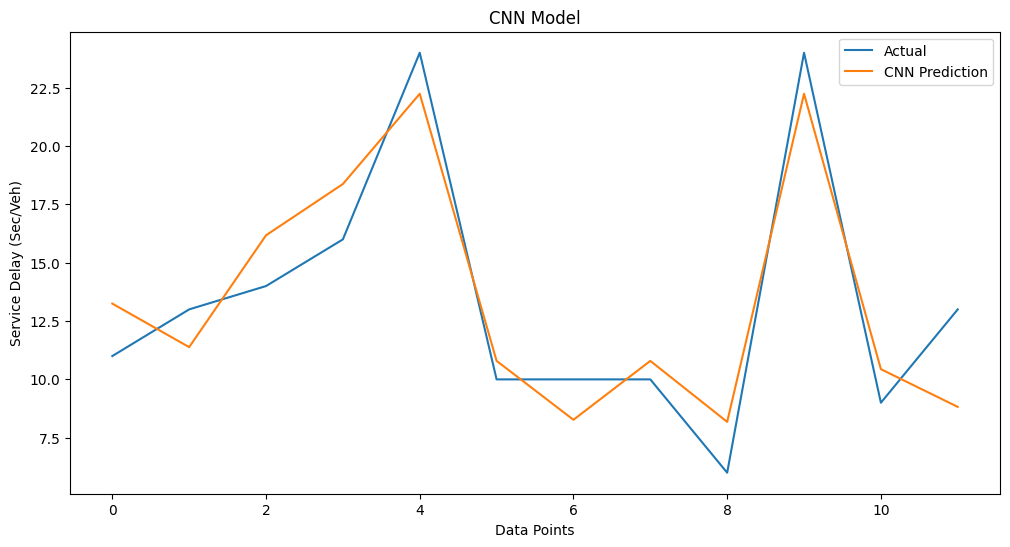

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [102]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/600
2/2 [==============================] - 1s 166ms/step - loss: 234.6328 - val_loss: 205.9472
Epoch 2/600
2/2 [==============================] - 0s 17ms/step - loss: 233.5916 - val_loss: 205.0165
Epoch 3/600
2/2 [==============================] - 0s 17ms/step - loss: 232.6597 - val_loss: 204.1011
Epoch 4/600
2/2 [==============================] - 0s 17ms/step - loss: 231.6423 - val_loss: 203.1290
Epoch 5/600
2/2 [==============================] - 0s 24ms/step - loss: 230.5272 - val_loss: 202.0293
Epoch 6/600
2/2 [==============================] - 0s 26ms/step - loss: 229.3774 - val_loss: 200.7467
Epoch 7/600
2/2 [==============================] - 0s 17ms/step - loss: 227.9962 - val_loss: 199.2622
Epoch 8/600
2/2 [==============================] - 0s 23ms/step - loss: 226.4514 - val_loss: 197.5782
Epoch 9/600
2/2 [==============================] - 0s 29ms/step - loss: 224.5533 - val_loss: 195.6361
Epoch 10/600
2/2 [==============================] - 0s 15ms/step - loss: 222.3002

Visualize CNN_LSTM results

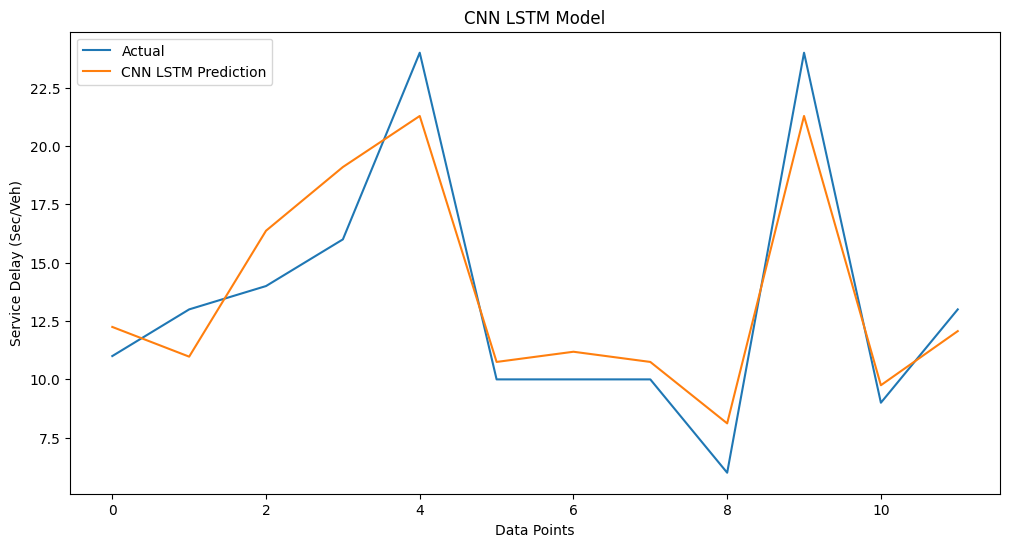

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [104]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/600
2/2 [==============================] - 2s 267ms/step - loss: 235.0529 - val_loss: 205.7639
Epoch 2/600
2/2 [==============================] - 0s 33ms/step - loss: 233.2594 - val_loss: 204.2027
Epoch 3/600
2/2 [==============================] - 0s 16ms/step - loss: 231.5352 - val_loss: 202.6676
Epoch 4/600
2/2 [==============================] - 0s 18ms/step - loss: 229.8752 - val_loss: 201.0683
Epoch 5/600
2/2 [==============================] - 0s 32ms/step - loss: 228.1634 - val_loss: 199.3083
Epoch 6/600
2/2 [==============================] - 0s 16ms/step - loss: 226.2007 - val_loss: 197.3200
Epoch 7/600
2/2 [==============================] - 0s 21ms/step - loss: 223.9884 - val_loss: 195.0106
Epoch 8/600
2/2 [==============================] - 0s 16ms/step - loss: 221.5874 - val_loss: 192.3247
Epoch 9/600
2/2 [==============================] - 0s 16ms/step - loss: 218.4904 - val_loss: 189.1589
Epoch 10/600
2/2 [==============================] - 0s 31ms/step - loss: 214.8413

Visualize CNN_BiLSTM results

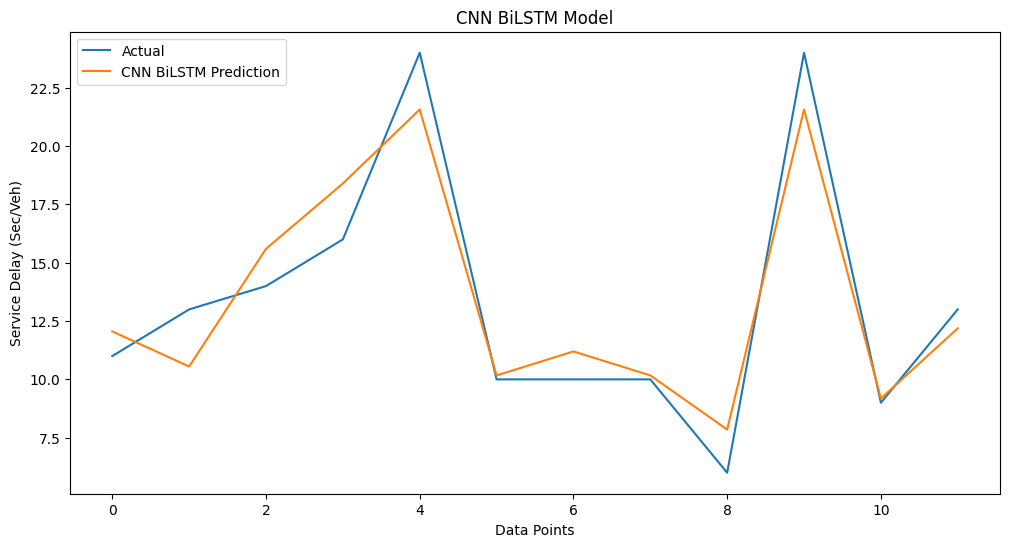

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [106]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

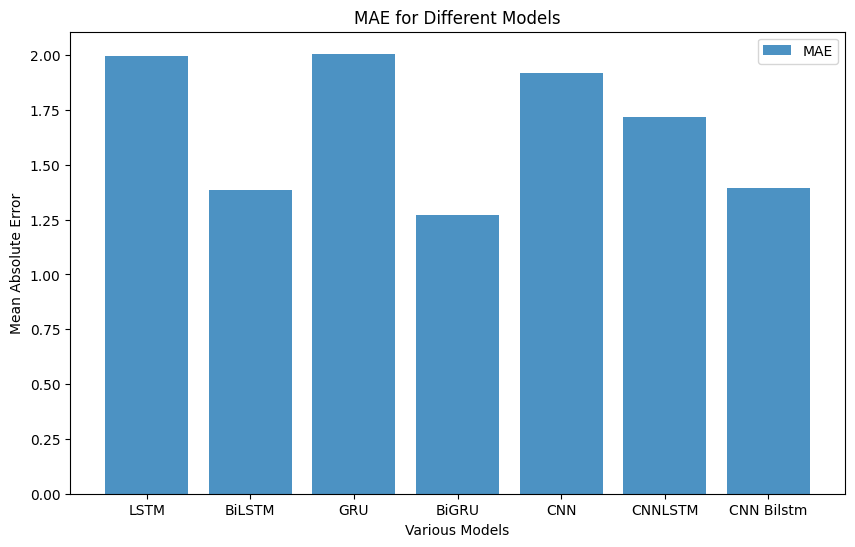

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

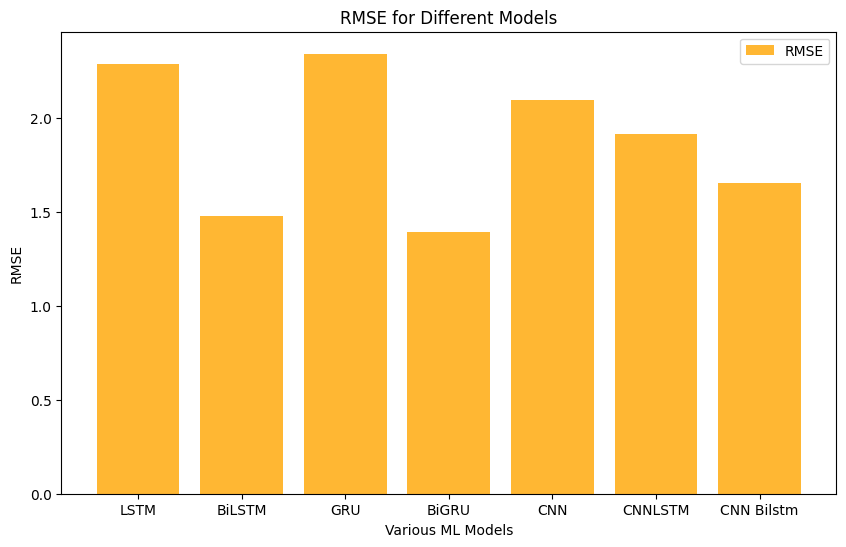

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

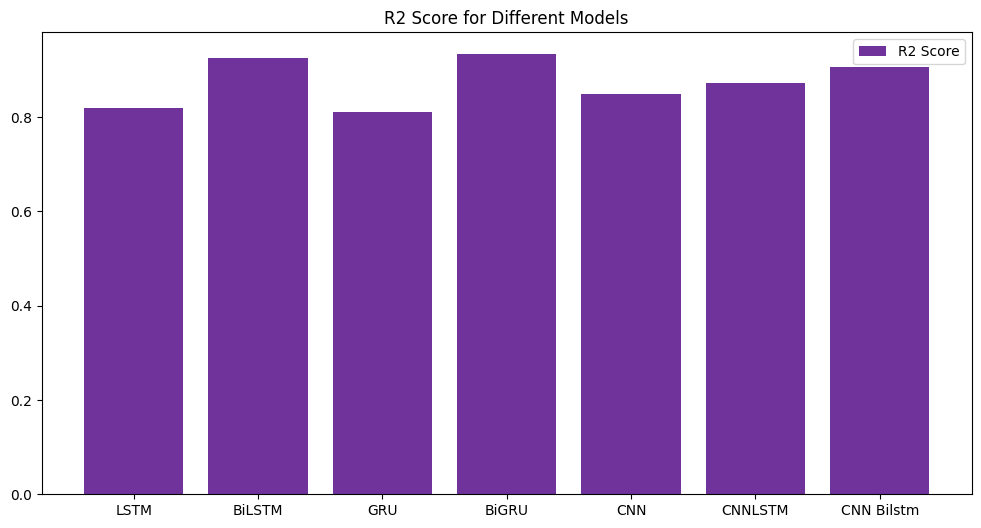

In [109]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [110]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 1.9978596369425456
LSTM MSE: 2.2873992022533463
LSTM R2 Score: 0.8188855538683724

BiLSTM MAE: 1.387353738149007
BiLSTM MSE: 1.47626595571229
BiLSTM R2 Score: 0.9245605748155535

GRU MAE: 2.0070791244506836
GRU MSE: 2.340935640683361
GRU R2 Score: 0.8103083959061748

BiGRU MAE: 1.2691281239191692
BiGRU MSE: 1.3918761936116755
BiGRU R2 Score: 0.9329389459804371

CNN MAE: 1.9204400380452473
CNN MSE: 2.096713839630023
CNN R2 Score: 0.8478235372012897

CNN LSTM MAE: 1.7202282746632893
CNN LSTM MSE: 1.9152258579030679
CNN LSTM R2 Score: 0.873027650842212

CNN BiLSTM MAE: 1.3950562477111816
CNN BiLSTM MSE: 1.654241015771376
CNN BiLSTM R2 Score: 0.9052745382909891


Plot predictions for each model

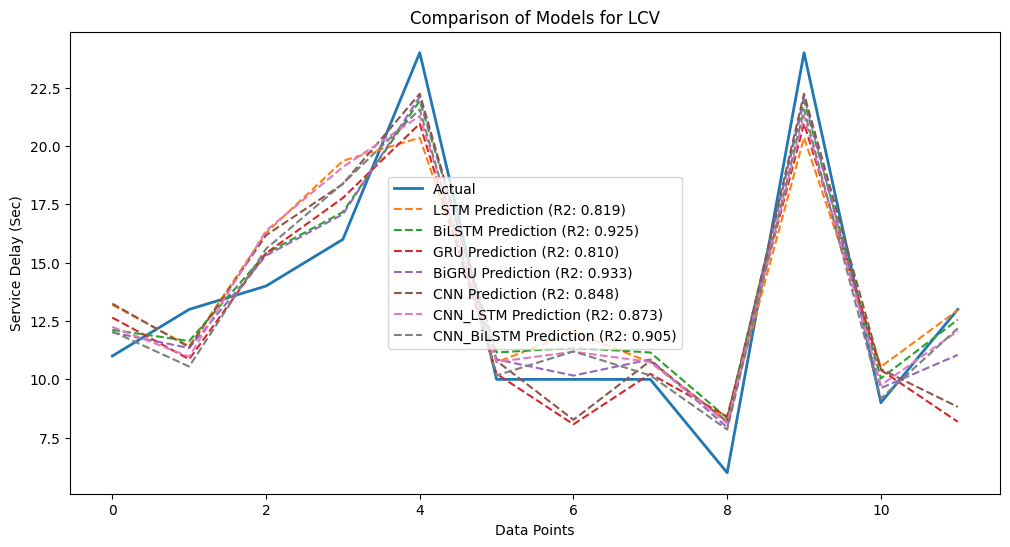

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for LCV')
plt.show()

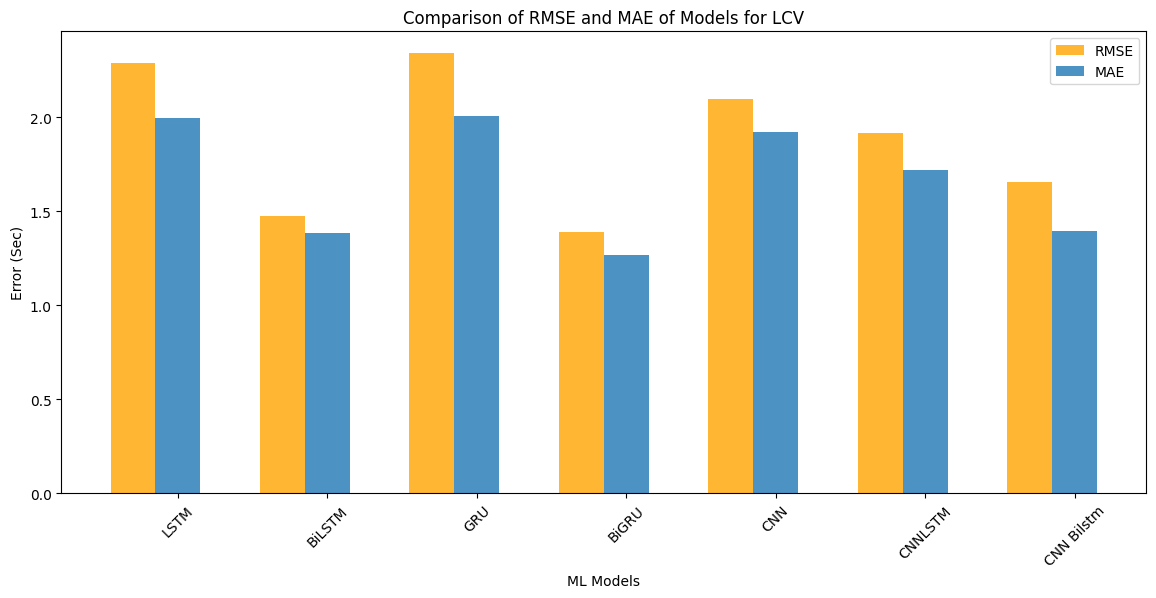

In [114]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for LCV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()